# Experiment Design Report #1
202021682 Qiushi Pan

### * Introduction: Describe your scientific question, its relevance and why do you need an experiment for it.

My research area is Machine Learning (ML). My current research topic is the adaptation of ML to e-learning systems. On e-learning systems Such as MOOCs, students take lectures on computer devices. Then the systems will record the students’ study logs. Many people try to utilize these big data. An adaptation is called Knowledge Tracing (KT), which tries to estimate whether students will answer correctly after given a sequence of his/her study records. We follow related research to adapt ML to the KT task, which is called Deep Knowledge Tracing (DKT). DKT made huge progress compared to previous models in terms of accuracy. In our research, however, we pointed out there might be some problems in the predictions: We found that when a student answers correctly in a row the model could occasionally predict the student’s ability to be rather low. To evaluate this phenomenon, we used the NDCG function to calculate the score between the number of correct answers in the input sequence and the prediction score of the model to give that input. This score indicates how well the model takes the input sequence into consideration. 

Then we examined the model trained on the open dataset. We found that even when the model is providing a good accuracy score, the NDCG score can be small. Meaning that if the students behave Too much differently from what has been recorded in the log data, for example, if the student keeps practicing on the same topic too long, the model can predict poorly even if the students keep answering correctly.

In this report, I’d like to make an experimental design to investigate whether if the Low NDCG score is related to a lack of input data size on that specific Knowledge Concept (KC). Here KC means the academic ability required to solve a problem.

We used the NDCG function to measure the goodness of ordering between input (1) and prediction (2).

### * Experiment Design: Describe how you will collect data to answer your scientific question; Make sure to mention any parameters or factors that must be controlled;

#### (1.1)
Count the occurrence of Each KCs in the dataset. Then draw a scatter plot and examine whether there is a correlation between the baseline NDCG score and the KC’s data size.

#### (1.2)
Scatter plot the relation of the KC count and the NDCG score of our new model.

#### (1.3)
Draw scatter plot of the relation of the KC counts and NDCG gain using our model.

### * Data Collection: Report on your data collection, if anything happened outside of expected from the experimental design;

I use the Statics2011 open dataset. Here I count the occurrence of each KC in the dataset.

I use the NDCG score already calculated in my previous research.

The data collection code is shown below. Since I use this as my research, I can't provide the raw data. However, as I share the source code, it is shown to be reproducible.

Analysis is after the code.

In [1]:
import sys
import json
from pathlib import Path
from collections import defaultdict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('..')
from src.data import load_qa_format_source

In [2]:
projectdir = Path('..')

train_path = projectdir / 'data/input/STATICS/STATICS_train.csv'
test_path = projectdir / 'data/input/STATICS/STATICS_test.csv'
id_path = projectdir / 'data/input/STATICS/STATICS_qid_sid_sname'
assert train_path.exists()
assert test_path.exists()
assert id_path.exists()

train_qa = load_qa_format_source(train_path)
test_qa = load_qa_format_source(test_path)
del train_path
del test_path

with open(projectdir / 'output/20_0310_edm2020_statics/pre_dummy_epoch_size0.auto/report/20200310-0202/report.json', 'r') as f:
    report_pre00 = json.load(f)
with open(projectdir / 'output/20_0310_edm2020_statics/pre_dummy_epoch_size10.auto/report/20200310-0404/report.json', 'r') as f:
    report_pre10 = json.load(f)

ndcg_00 = report_pre00['indicator']['RPhard']['all']
ndcg_10 = report_pre10['indicator']['RPhard']['all']

In [3]:
count = defaultdict(list)
for seq in train_qa+test_qa:
    for q, a in seq:
        count[q-1].append(a)
        
assert set(count.keys()) == set(range(1223))
count = [count[i] for i in range(1223)]
count_list = [len(count[i]) for i in range(1223)]

### Correlation coefficient（pre 0 vs pre 10）

`ndcg_00` is the baseline NDCG, `ndcg_10` is NDCG using our method.

#### (1.1) Examine correlation between KC count and NDCG (Baseline)

Corr coef = -0.017273767116509027


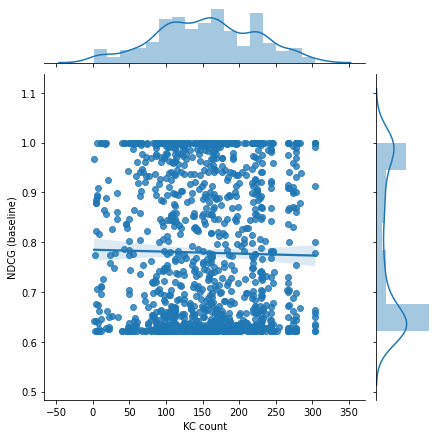

In [4]:
# 1.1
corrcoef = np.corrcoef(x=count_list, y=ndcg_00)[0][1]
print("Corr coef =", corrcoef)
ax = sns.jointplot(x=count_list, y=ndcg_00, kind='reg')
plt.xlabel("KC count")
plt.ylabel("NDCG (baseline)")
plt.show()

#### (1.2) Examine correlation between KC count and NDCG (Ours)

Corr coef = [[ 1.         -0.12971755]
 [-0.12971755  1.        ]]


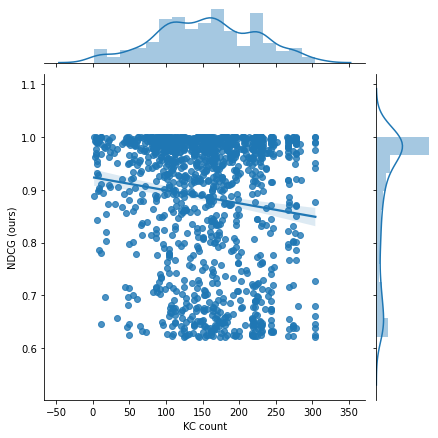

In [5]:
# 1.2
corrcoef = np.corrcoef(x=count_list, y=ndcg_10)
print("Corr coef =", corrcoef)
sns.jointplot(x=count_list, y=ndcg_10, kind='reg')
plt.xlabel("KC count")
plt.ylabel("NDCG (ours)")
plt.show()

#### (1.3) Examine correlation between KC count and NDCG gain

Corr coef = [[ 1.         -0.06907159]
 [-0.06907159  1.        ]]


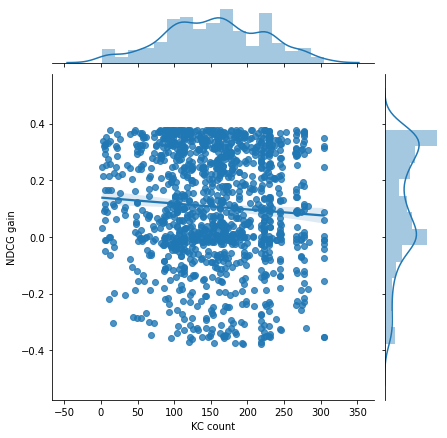

In [6]:
# 1.3
_y = [n10 - n0 for n10, n0 in zip(ndcg_10, ndcg_00)]
corrcoef = np.corrcoef(x=count_list, y=_y)
print("Corr coef =", corrcoef)
sns.jointplot(x=count_list, y=_y, kind='reg')
plt.xlabel("KC count")
plt.ylabel("NDCG gain")
plt.show()

### * Analysis: Describe your results in detail, and what answer they provide to your scientific question;

In my original experiment design, I intended to plot fiture (1.1). As shown above, the correlation coefficient is too low, meaning there is no correlation between KC count and NDCG. 

Then I examined whether there is correlation when using NDCG score from our model. The result is shown in (1.2). Although the scatter graph looks like there is weak correlation, the correlation coefficient value is lower than 0.2, which is sill too weak to say there is correlation.

Finally, I investigated whether there is correlation between the KC count and the NDCG gain. Since (1.2) shows there is not enough but yet -0.12 coefficient score, my hypothesise is that the NDCG gain might be larger enough to show some correlation. However, as result shows in (1.3), there is not.
So after all, all my hypothesise are denied. 